### Titanic From Disaster_train
Qeust_목표변수: 생존여부
Qeust_설명변수: 연속, 범주 7개 이상

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [3]:
df_TFD= pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TFD[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_TFD.isnull().sum()
# cabin 자체를 drop 시키고 진행하겠음. _null값이 너무 큼. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_TFD_drop=df_TFD.drop(columns=['Cabin'])
df_TFD_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
df_TFD_drop['Survived'].value_counts()
# object 변환 필

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df_TFD_drop['Pclass'].value_counts()
# object 변환 필

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
df_TFD_drop['SibSp'].value_counts()
# object 변환 필

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
df_TFD_drop['Parch'].value_counts()
# object 변환 필

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
df_TFD_drop['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [12]:
df_TFD_drop[['Survived','Pclass','SibSp','Parch']]=df_TFD_drop[['Survived','Pclass','SibSp','Parch']].astype(object)
df_TFD_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ KB


### DDA ?
    - 목표변수: 'Survived'_범주형
    - 설명변수: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
                -Pclass_범주형
                -Sex_범주형
                -Age_연속형
                -Sibsp(형제자매수)_범주
                -Parch(부모자녀동반탑승)_범주
                -Fare_연속
                -Embarked(항구_C = Cherbourg, Q = Queenstown, S = Southampton)_범주

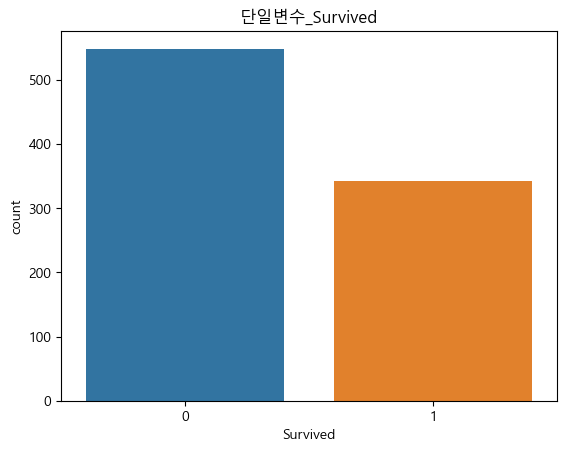

In [13]:
# 목표변수
sns.countplot(data=df_TFD_drop, x='Survived')
plt.title('단일변수_Survived')
plt.show()

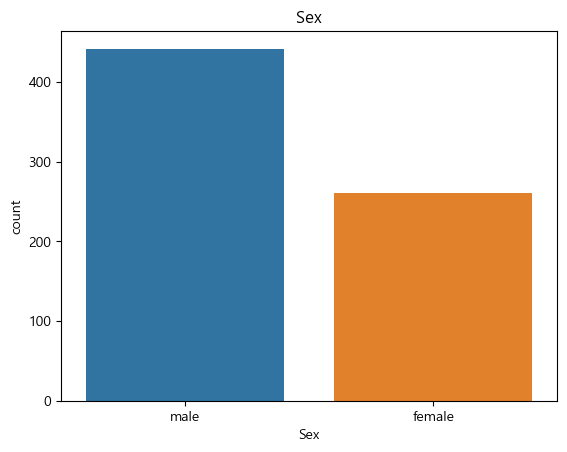

In [48]:
sns.countplot(data=df_TFD_drop, x='Sex')
plt.title('Sex')
plt.show()

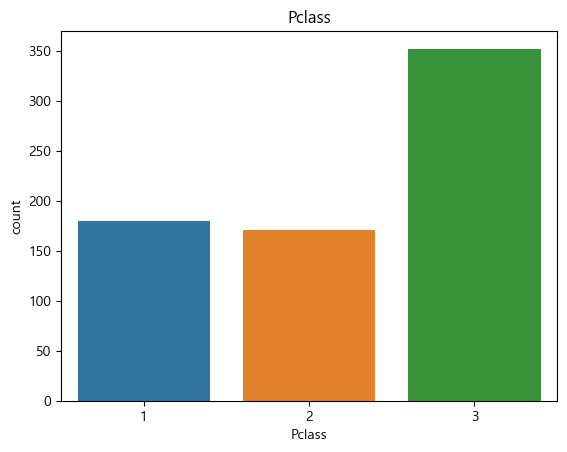

In [50]:
sns.countplot(data=df_TFD_drop, x='Pclass')
plt.title('Pclass')
plt.show()

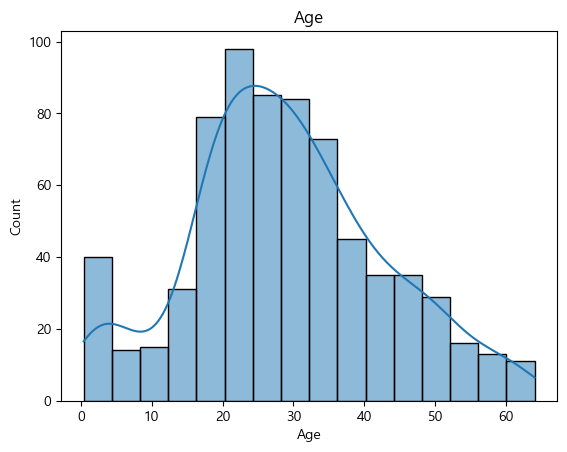

In [51]:
sns.histplot(data=df_TFD_drop, x='Age', kde=True)
plt.title('Age')
plt.show()

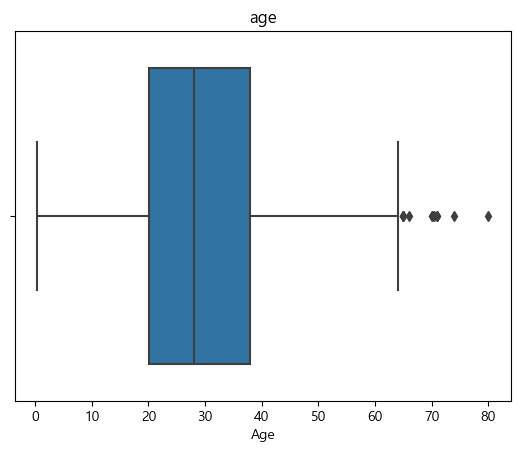

In [19]:
sns.boxplot(data=df_TFD_drop, x='Age')
plt.title('age')
plt.show()

In [52]:
#이상치 제거_연령
df_TFD_drop['Age'].describe()

count    703.000000
mean      29.072077
std       13.728478
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       64.000000
Name: Age, dtype: float64

In [53]:
# Q1,Q3 범위구함
Q1 = df_TFD_drop['Age'].describe()['25%']
Q3 = df_TFD_drop['Age'].describe()['75%']
IQR = Q3-Q1

In [54]:
bound_up = Q3 + 1.5 *IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(-7.0, 65.0)

In [55]:
# filter 범위안에 들어가있는거만 선택하고싶음.
condition = (df_TFD_drop['Age'] <= bound_up)
condition

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: Age, Length: 703, dtype: bool

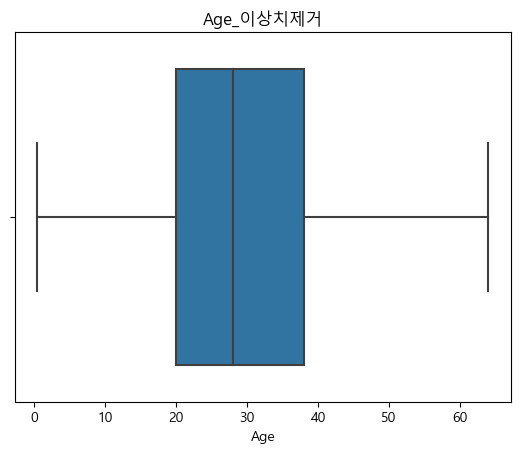

In [56]:
df_TFD_drop = df_TFD_drop[condition]
sns.boxplot(data=df_TFD_drop, x='Age')
plt.title('Age_이상치제거')
plt.show()

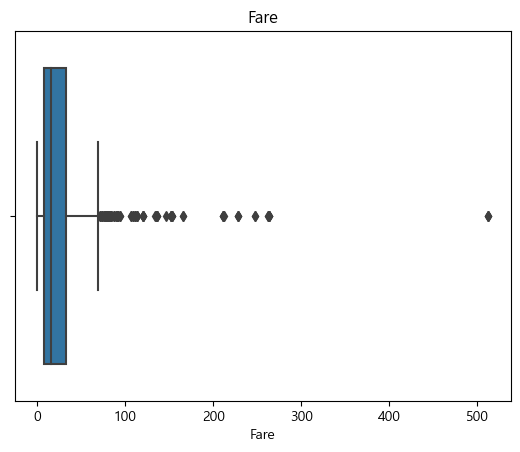

In [68]:
sns.boxplot(data=df_TFD_drop, x='Fare')
plt.title('Fare')
plt.show()

In [69]:
df_TFD_drop['Fare'].describe()

count    703.000000
mean      34.785093
std       53.255433
min        0.000000
25%        8.050000
50%       15.741700
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [71]:
# Q1,Q3 범위구함
Q1 = df_TFD_drop['Fare'].describe()['25%']
Q3 = df_TFD_drop['Fare'].describe()['75%']
IQR = Q3-Q1

In [72]:
bound_up = Q3 + 1.5 *IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(-29.374999999999996, 70.425)

In [73]:
# filter 범위안에 들어가있는거만 선택하고싶음.
condition = (df_TFD_drop['Fare'] <= bound_up)
condition

0       True
1      False
2       True
3       True
4       True
       ...  
885     True
886     True
887     True
889     True
890     True
Name: Fare, Length: 703, dtype: bool

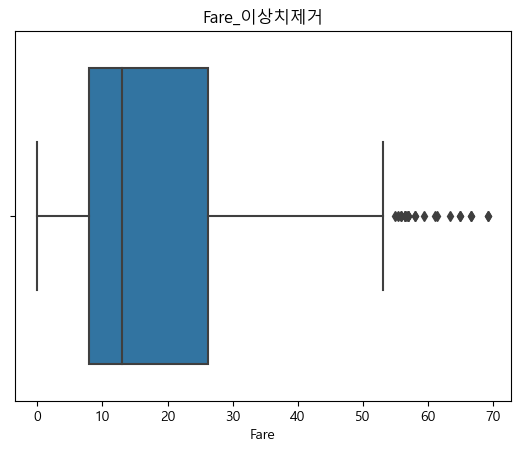

In [74]:
df_TFD_filter = df_TFD_drop[condition]
sns.boxplot(data=df_TFD_filter, x='Fare')
plt.title('Fare_이상치제거')
plt.show()

In [75]:
df_TFD_filter['Fare'].describe()

count    607.000000
mean      18.933401
std       14.184362
min        0.000000
25%        7.925000
50%       13.000000
75%       26.250000
max       69.300000
Name: Fare, dtype: float64

In [76]:
# Q1,Q3 범위구함
Q1 = df_TFD_filter['Fare'].describe()['25%']
Q3 = df_TFD_filter['Fare'].describe()['75%']
IQR = Q3-Q1

In [77]:
bound_up = Q3 + 1.5 *IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(-19.562499999999996, 53.7375)

In [78]:
# filter 범위안에 들어가있는거만 선택하고싶음.
condition = (df_TFD_filter['Fare'] <= bound_up)
condition

0      True
2      True
3      True
4      True
6      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: Fare, Length: 607, dtype: bool

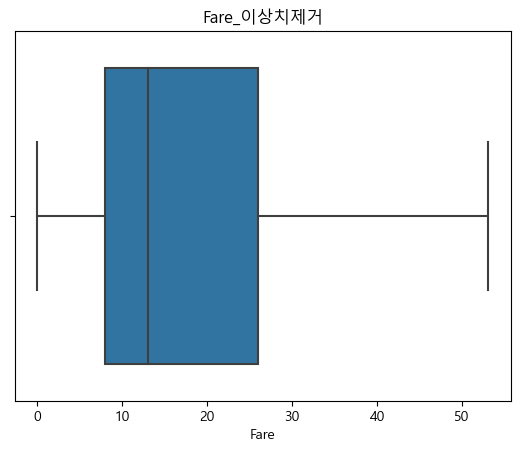

In [79]:
df_TFD_filter = df_TFD_filter[condition]
sns.boxplot(data=df_TFD_filter, x='Fare')
plt.title('Fare_이상치제거')
plt.show()

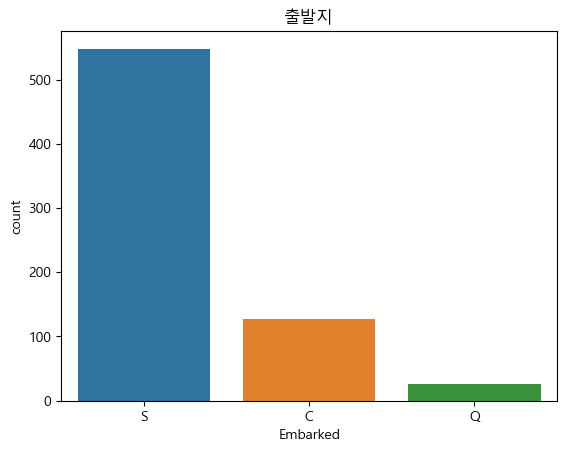

In [80]:
sns.countplot(data=df_TFD_drop, x='Embarked')
plt.title('출발지')
plt.show()

### EDA 
#### y_범주-x_연속
    - 목표변수: 생존여부_범주형 0 = 아님, 1= 생존
    - 설명변수: 'Age','Fare'
                -Age_연속형 : 나이별 생존여부를 확인해보면 차이가 미미한것으로 보여짐. 
                -Fare_연속 : 단일변수로 fare를 여러번 제거 후 요금별 생존여부를 확인했을때 요금이 비쌀 수록 생존한것으로 보여짐. 

    

In [89]:
# 연속형은 Fare 이상치 제거한거로.
df_TFD_filter_list=df_TFD_filter.drop(columns=['PassengerId']).describe().columns.to_list()
df_TFD_filter_list

['Age', 'Fare']

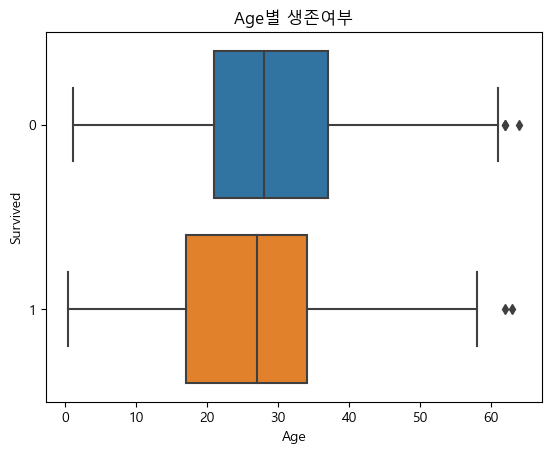

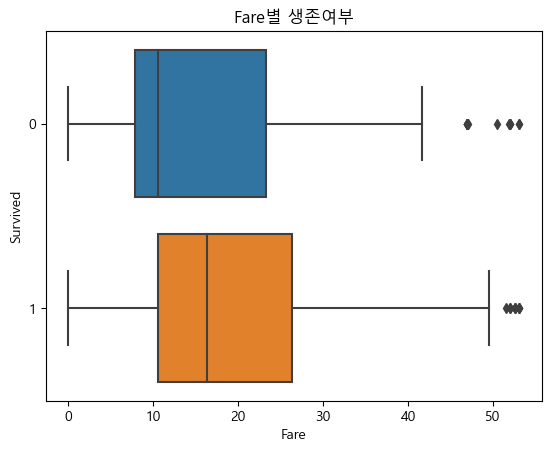

In [94]:
## 생존여부-age, fare (범주-연속)
for item in df_TFD_filter_list:
    sns.boxplot(data=df_TFD_filter, x=item, y='Survived', orient='h')
    plt.title(item + '별 생존여부')
    plt.show()

### EDA
#### y_범주-x_범주
    - 목표변수: 생존여부_범주형 0 = 아님, 1= 생존
    - 설명변수: 'Pclass', 'Sex','SibSp', 'Parch','Embarked'
                -Pclass_범주형 : Pclass에 따라서 생존 여부 영향이 보임. 
                -Sex_범주형  : 여성에 생존값이 높은것으로 보아 여자들을 먼저 구하려고 했을까?싶음. 
                -Sibsp(형제자매수)_범주: 형제가 한명이라도 있으면 생존 여부가 늘어남. 형제가 서로를 챙겨줌. 그리고 오히려 많다면 큰자녀만 환경에 버텨서 살아남았거나 or 막내가 형제들의 도움으로 살아남은 경우가 잇을거같음. 
                -Parch(부모자녀동반탑승)_범주 : 부모 동반 자녀에 생존 여부는 차이가 미미한것으로 보임. 
                -Embarked(항구_C = Cherbourg, Q = Queenstown, S = Southampton)_범주 : 항구 C에서 탑승한 승객들의 생존이 높은것으로 보아.. 왜죠???
                잘 모르겠지만 탑승 항구 영향이 있어보임. 


In [108]:
df_TFD_drop_list=df_TFD_drop.describe(include=object).drop(columns=['Name','Survived','Ticket']).columns.to_list()
df_TFD_drop_list

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

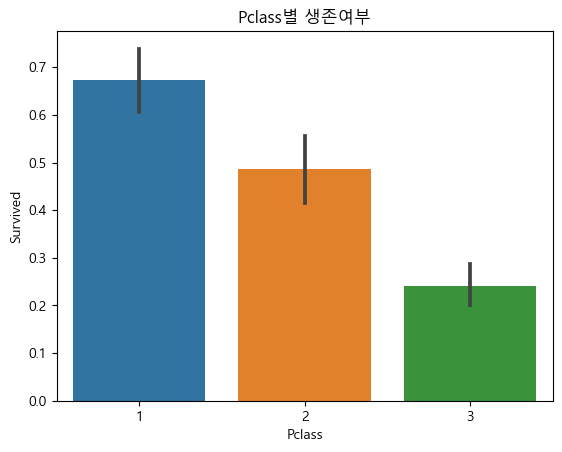

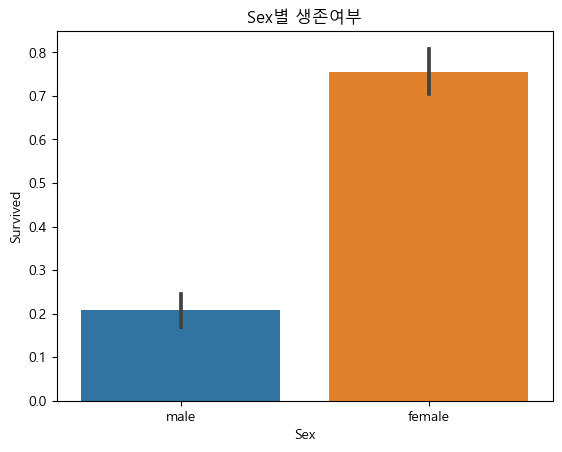

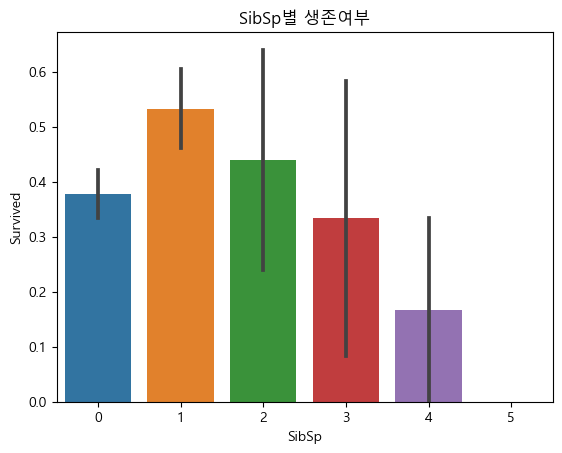

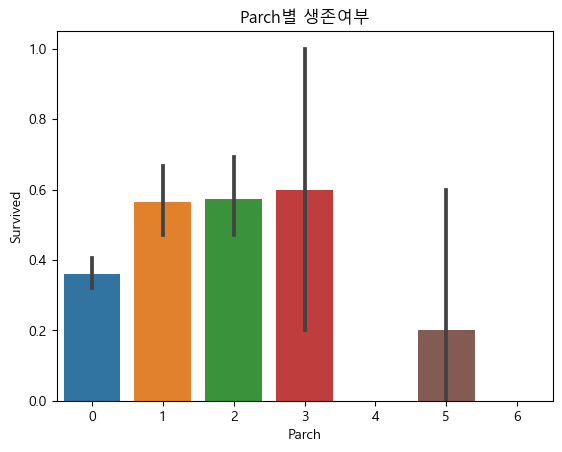

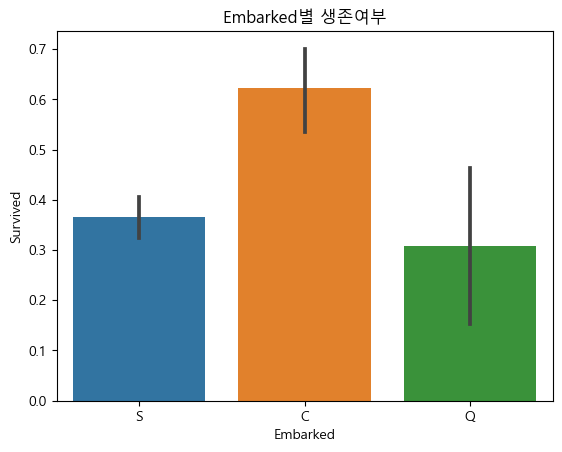

In [109]:
for item in df_TFD_drop_list:
    sns.barplot(data=df_TFD_drop, x=item, y='Survived')
    plt.title(item+'별 생존여부')
    plt.show()

- 요금 이상치 제외하고 확인했을때 요금 500 이상인 곳은 생존함. 

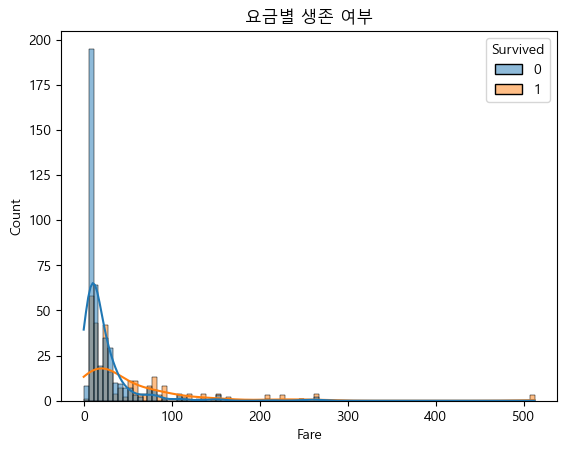

In [111]:
sns.histplot(data=df_TFD_drop, x='Fare',  hue='Survived', kde = True)
plt.title('요금별 생존 여부')
plt.show()

- 요금이 저렴했을 때, 생존하지 못함.

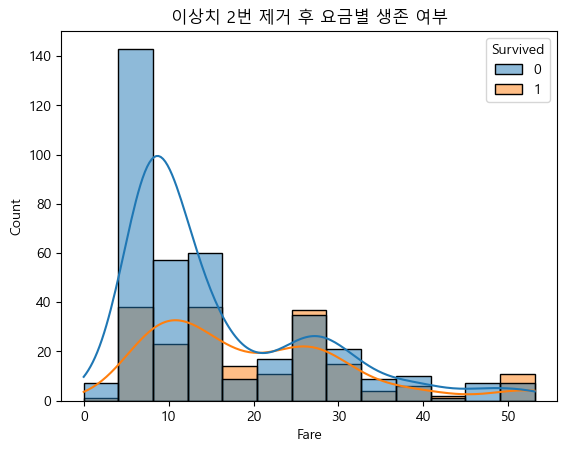

In [112]:
sns.histplot(data=df_TFD_filter, x='Fare',  hue='Survived', kde = True)
plt.title('이상치 2번 제거 후 요금별 생존 여부')
plt.show()